In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def step(x, y, s, u, N, drift):
    z = 1 - x - y
    w = x * (1 + s) + y * (1 + s) + z
    
    x = x * (1 + s) / w
    y = (y * (1 + s) + z * u) / w
    
    if drift:
        x, y, _ = np.random.multinomial(N, (x, y, 1-x-y)) / N
    
    return x, y

In [3]:
def simulation(s, u, N, drift=True):
    x = 1/N
    y = 0
    t = 0
    while x + y < 1-1/N:
        t += 1
        x, y = step(x, y, s, u, N, drift)
        if x == 0:
            return 0
    return t

In [51]:
N = np.logspace(4, 8, 50)
n = 5000
res0 = []
for N_ in N:
    t0 = np.array([simulation(0.02, 0, N_) for _ in range(n)])
    res0.append((t0[t0>0].mean(), t0[t0>0].std(), (t0>0).sum()))

In [52]:
res = []
for N_ in N:
    t = np.array([simulation(0.02, 1e-7, N_) for _ in range(n)])
    res.append((t[t>0].mean(), t[t>0].std(), (t>0).sum()))

In [53]:
res0 = np.array(res0)
res = np.array(res)

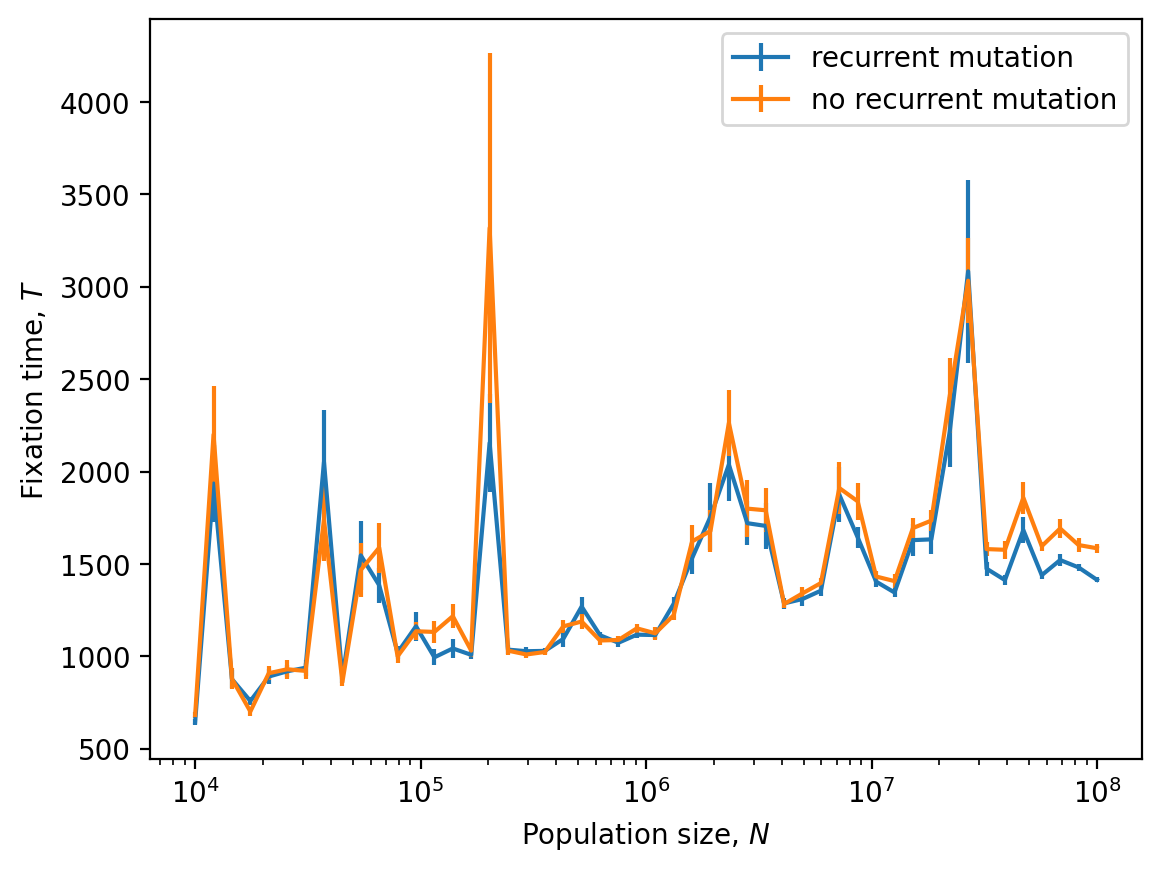

In [54]:
plt.errorbar(N, res[:,0], res[:,1]/np.sqrt(res[:,2]), label='recurrent mutation')
plt.errorbar(N, res0[:,0], res0[:,1]/np.sqrt(res0[:,2]), label='no recurrent mutation')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Population size, $N$')
plt.ylabel('Fixation time, $T$')
plt.legend();